#**Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#**Import cleaned data**

In [ ]:
data=pd.read_csv('cardata.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [ ]:
for i in data.columns:
    print(data[i].value_counts())
    print()

high     432
vhigh    432
med      432
low      432
Name: buying, dtype: int64

high     432
vhigh    432
med      432
low      432
Name: maint, dtype: int64

4        432
3        432
2        432
5more    432
Name: doors, dtype: int64

more    576
4       576
2       576
Name: persons, dtype: int64

big      576
med      576
small    576
Name: lug_boot, dtype: int64

high    576
med     576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



#**EDA**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


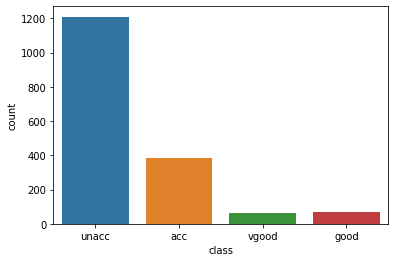

In [ ]:
sns.countplot(data['class'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

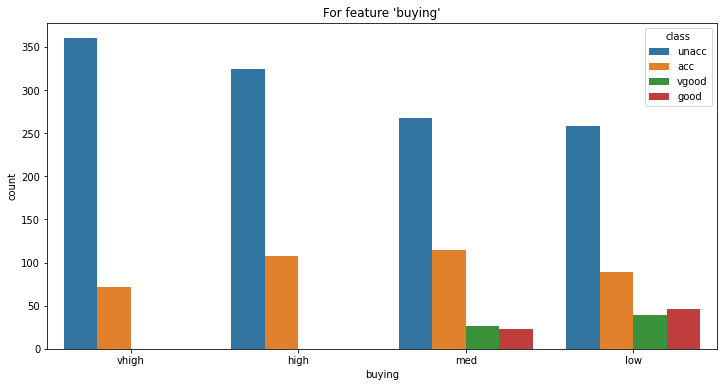

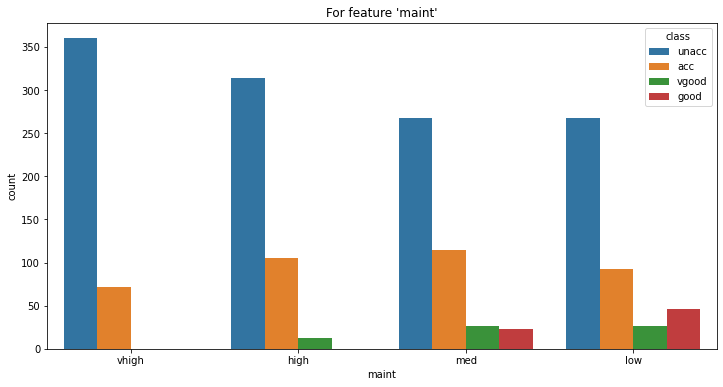

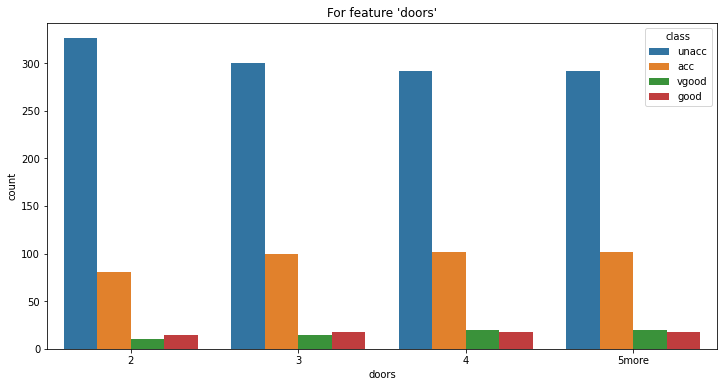

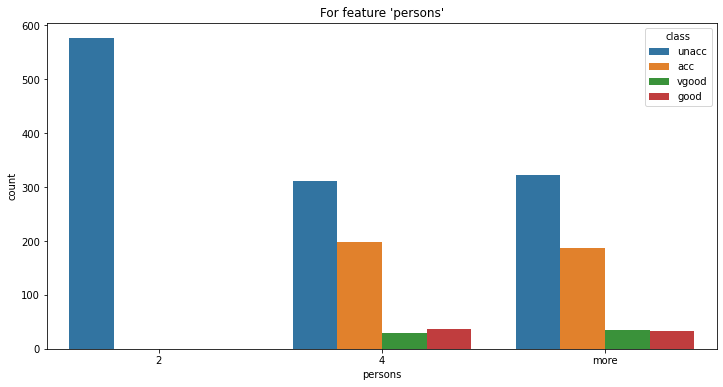

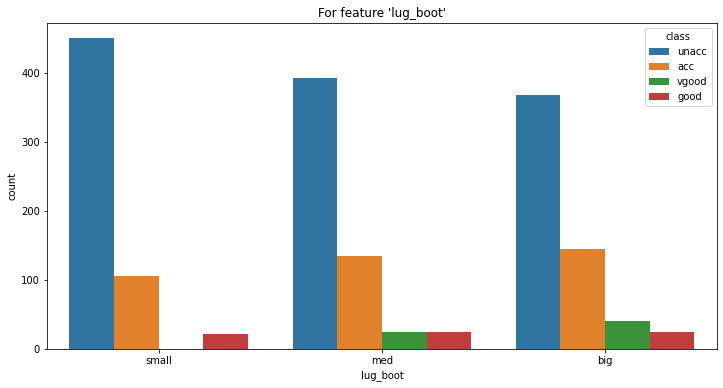

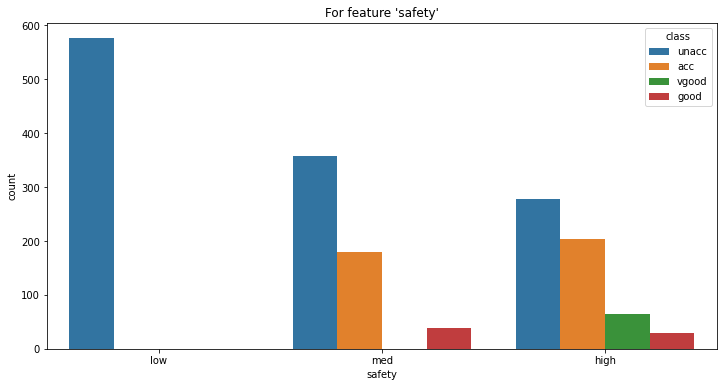

In [ ]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


#**Correlation Matrix**

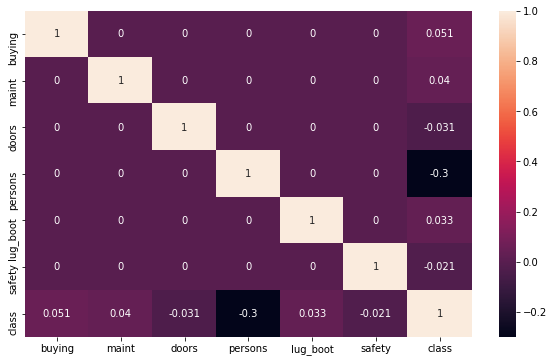

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
X=data[data.columns[:-1]]
y=data['class']

In [ ]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


**Split to train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV


In [ ]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)


0.6647398843930635

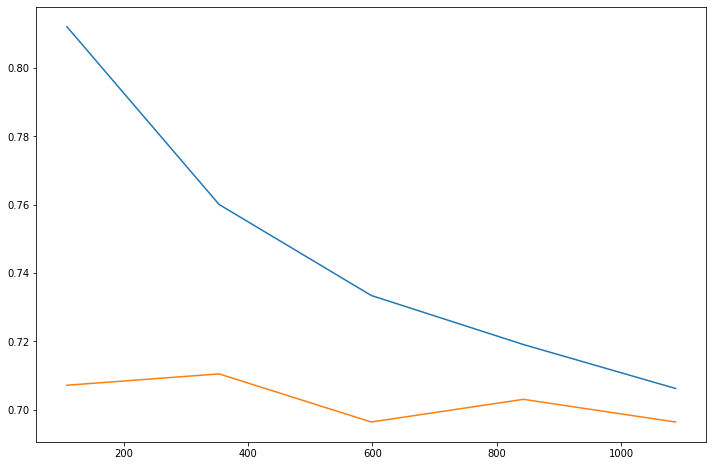

In [ ]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [ ]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [ ]:
curve

(array([[0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70837642, 0.71768356, 0.70837642, 0.71354705, 0.7107438 ],
        [0.70527404, 0.71251293, 0.70630817, 0.70527404, 0.70764463]]),
 array([[0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.73966942, 0.67355372, 0.7107438 , 0.70661157, 0.70124481],
        [0.70247934, 0.66942149, 0.70661157, 0.7107438 , 0.70539419]]))

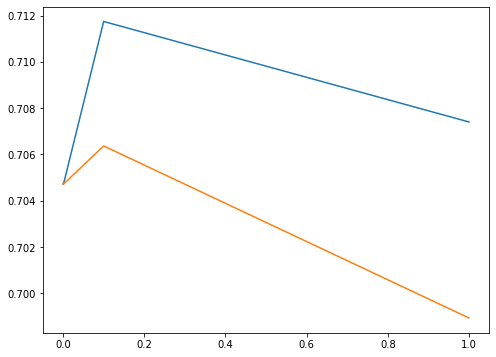

In [ ]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [ ]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)


{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7096807379719489


#**Random Forrest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.9730250481695568
0.9245337130459484


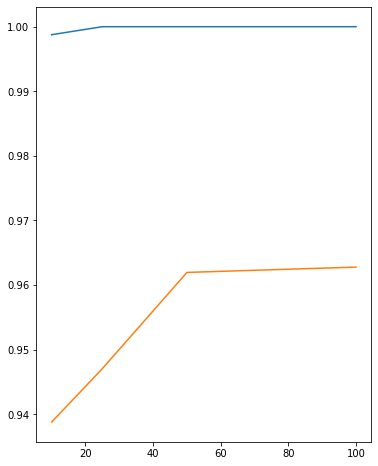

In [ ]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

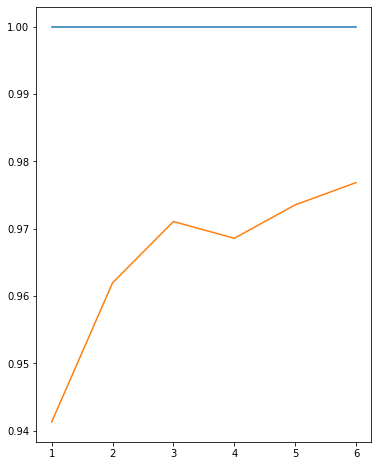

In [ ]:
  param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [ ]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [ ]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': None}
0.9826170798898073


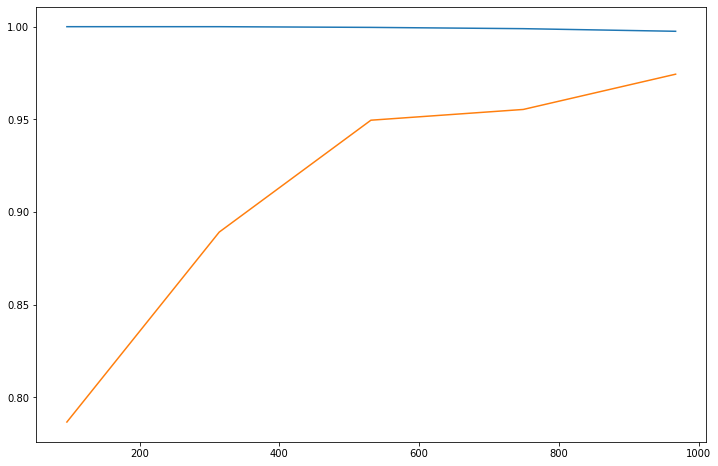

In [ ]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [ ]:
print(X.columns)
print(rfc.feature_importances_)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[0.1906157  0.16642232 0.06901749 0.22867226 0.0879754  0.25729683]


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maint', 'persons', 'lug_boot', 'safety']],
    y, test_size=0.3, random_state=42)

In [ ]:
rfc1=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=5,max_depth=10,random_state=51,
    max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,y_train1)
rfc1.score(X_test1,y_test1)

0.9364161849710982

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 5]}
DT = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
DT.fit(X_train, y_train)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1176 out of 1176 | elapsed:    5.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [ ]:
print(DT.best_params_)

{'max_leaf_nodes': 97, 'min_samples_split': 2}


In [ ]:
DT_acc=DT.best_score_
print(DT_acc)

0.9710504549214227


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(),X_train, y_train, cv=5)

array([0.96694215, 0.97107438, 0.97933884, 0.97933884, 0.9626556 ])

In [ ]:
DT_pred = DT.predict(X_test)

In [ ]:
#print (roc_auc_score(y_test, DT_pred))
#print (classification_report(y_test, DT_pred))

In [ ]:
f_measure_score = {'decision_tree':{},'knn':{},'logistic':{},'NB':{},'svm':{}}

para_tree = {'criterion':['entropy'],'max_depth':list(range(8,11)),'min_samples_leaf':list(range(1,4)),'random_state':[45]}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)

d_tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(d_tree, para_tree, cv = cv, scoring='f1_micro')
grid_tree.fit(X_train,y_train)
y_pred_tree = grid_tree.predict(X_test)
nested_score_tree = cross_val_score(grid_tree, X = X, y = y, cv = cv) 
f_measure_score['decision_tree']['mean'] = np.mean(nested_score_tree)
f_measure_score['decision_tree']['std'] = np.std(nested_score_tree)

In [ ]:
print('precision,recall,f-measure\n', classification_report(y_test,y_pred_tree))

precision,recall,f-measure
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       118
           1       0.71      0.89      0.79        19
           2       0.99      0.98      0.99       358
           3       0.88      0.88      0.88        24

    accuracy                           0.96       519
   macro avg       0.88      0.92      0.89       519
weighted avg       0.96      0.96      0.96       519



In [ ]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'random_state': 45}

##**Naive_bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nested_score_nb = cross_val_score(nb, X = X, y = y, cv = cv) 
f_measure_score['NB']['mean'] = np.mean(nested_score_nb)
f_measure_score['NB']['std'] = np.std(nested_score_nb)

In [ ]:
print('precision,recall,f-measure\n', classification_report(y_test,y_pred_nb),'\n')

precision,recall,f-measure
               precision    recall  f1-score   support

           0       0.48      0.09      0.16       118
           1       0.00      0.00      0.00        19
           2       0.84      0.84      0.84       358
           3       0.17      1.00      0.30        24

    accuracy                           0.65       519
   macro avg       0.37      0.48      0.32       519
weighted avg       0.70      0.65      0.63       519
 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for k,v in f_measure_score.items():
    print(k, ': ', v)

decision_tree :  {'mean': 0.9704597392122597, 'std': 0.014829034884763247}
knn :  {}
logistic :  {}
NB :  {'mean': 0.6284715687592418, 'std': 0.026871273544715583}
svm :  {}


In [ ]:
accuracy_decisiontree = grid_tree.score(X_test,y_test)
print('accuracy of decision tree: ', accuracy_decisiontree)

accuracy of decision tree:  0.9595375722543352


In [ ]:
accuracy_naivebayes = nb.score(X_test,y_test)
print('accuracy of naive bayes: ', accuracy_naivebayes)

accuracy of naive bayes:  0.649325626204239


##**GRADIENT BOOSTING** 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
m1 = GradientBoostingRegressor()
params1 = {'learning_rate': [1e-2, 1e-1, 1.0],
          'n_estimators': [50, 100, 200]}
grid1 = GridSearchCV(m1, params1, cv = 3)

In [ ]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
grid1.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [ ]:
print('train\t', grid1.score(X_train, y_train))
print('test\t', grid1.score(X_test, y_test))

train	 0.796246644598669
test	 0.6952392236566763


# **AdaBoostRegressor** 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
m2 = AdaBoostRegressor()
params2 = {'learning_rate': [1e-2, 1e-1, 1.0],
          'n_estimators': [50, 100, 200]}
grid2 = GridSearchCV(m2, params2, cv = 3)

In [ ]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid2.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [ ]:
print('train\t', grid2.score(X_train, y_train))
print('test\t', grid2.score(X_test, y_test))

train	 0.3732185072015868
test	 0.38135427447501546


#**XGBRegressor**

In [ ]:
from xgboost.sklearn import XGBRegressor
m3 = XGBRegressor()
params3 = {'eta': [3e-2, 3e-1, 3.0],
          'gamma': [0, 1, 10]}
grid3 = GridSearchCV(m3, params3, cv = 3)

In [ ]:
grid3.fit(X_train, y_train)

[07:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.03, 0.3, 3.0], 'gamma': [0, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [ ]:
grid3.best_params_

{'eta': 0.03, 'gamma': 0}

In [ ]:
print('train\t', grid3.score(X_train, y_train))
print('test\t', grid3.score(X_test, y_test))

train	 0.5712684574157397
test	 0.526724086530415


#**CatBoostRegressor**

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 61kB/s 


In [ ]:
from catboost import CatBoostRegressor
m5 = CatBoostRegressor()
params5 = {'learning_rate': [1e-2, 1e-1, 1.0],
          'depth': [2, 3, 4]}
grid5 = GridSearchCV(m5, params5, cv = 3)

In [ ]:
grid5.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.8191264	total: 712us	remaining: 712ms
1:	learn: 0.7949530	total: 1.09ms	remaining: 543ms
2:	learn: 0.7745980	total: 1.37ms	remaining: 454ms
3:	learn: 0.7551257	total: 1.63ms	remaining: 406ms
4:	learn: 0.7469565	total: 1.89ms	remaining: 376ms
5:	learn: 0.7386957	total: 2.16ms	remaining: 358ms
6:	learn: 0.7241360	total: 2.43ms	remaining: 345ms
7:	learn: 0.7123655	total: 2.7ms	remaining: 335ms
8:	learn: 0.7051711	total: 3ms	remaining: 331ms
9:	learn: 0.6955708	total: 3.26ms	remaining: 323ms
10:	learn: 0.6876330	total: 3.53ms	remaining: 317ms
11:	learn: 0.6785399	total: 3.83ms	remaining: 315ms
12:	learn: 0.6725225	total: 4.09ms	remaining: 311ms
13:	learn: 0.6636454	total: 4.39ms	remaining: 310ms
14:	learn: 0.6562189	total: 4.65ms	remaining: 306ms
15:	learn: 0.6507636	total: 4.92ms	remaining: 302ms
16:	learn: 0.6452473	total: 5.18ms	remaining: 300ms
17:	learn: 0.6422142	total: 5.46ms	remaining: 298ms
18:	learn: 0.6392444	total: 

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f4ced24aef0>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [2, 3, 4], 'learning_rate': [0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid5.best_params_

{'depth': 4, 'learning_rate': 0.1}

In [ ]:
print('train\t', grid5.score(X_train, y_train))
print('test\t', grid5.score(X_test, y_test))

train	 0.9005227962908107
test	 0.7730719107009613


#**Lasso**

In [ ]:
from sklearn.linear_model import Lasso
m7 = Lasso()
params7 = {'alpha': [1e-2, 1e-1, 1.0],
          'max_iter': [1000, 1500]}
grid7 = GridSearchCV(m7, params7, cv = 3)

In [ ]:
grid7.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1.0], 'max_iter': [1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid7.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [ ]:
print('train\t', grid7.score(X_train, y_train))
print('test\t', grid7.score(X_test, y_test))

train	 0.10115849126365106
test	 0.07793400477260182


#**Ridge**

In [ ]:
from sklearn.linear_model import Ridge
m8 = Ridge()
params8 = {'alpha': [1e-2, 1e-1, 1.0],
          'max_iter': [1000, 1500]}
grid8 = GridSearchCV(m8, params8, cv = 3)

In [ ]:
grid8.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1.0], 'max_iter': [1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid8.best_params_

{'alpha': 1.0, 'max_iter': 1000}

In [ ]:
print('train\t', grid8.score(X_train, y_train))
print('test\t', grid8.score(X_test, y_test))

train	 0.10189057300737547
test	 0.07601343559229623
